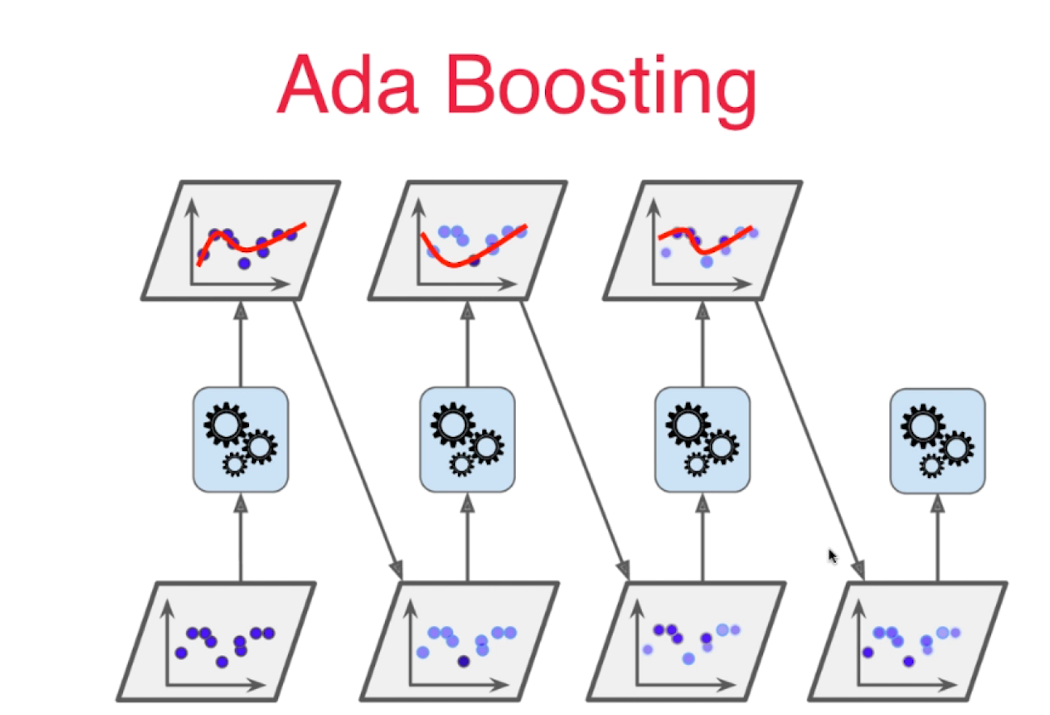

# Ada Boosting

## 集成多个模型，每个模型都在尝试增强boosting整体的效果

## 初始的时候，每个样本点的权重是一样的，使用一个算法，训练出一个模型。每一个模型都会犯错误，该模型在部分样本点上准确预测，而在另一部分样本点上却预测错误。

## 在这样的条件下，增大被错误预测的样本点的权重，然后，训练出新的模型。在这个新的模型下，部分样本点预测正确，而另一部分样本点预测错误。将预测错误的样本点增大权重。

## 以此类推，可以生成多个子模型。

## 利用这些子模型，进行投票，形成最终的预测结果。

# 因此，样本点的权重是比较重要的。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.3, random_state=666)

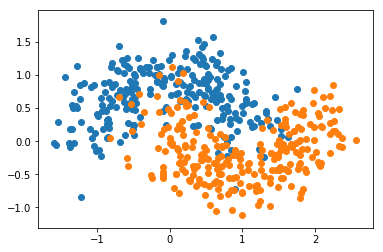

In [2]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=666)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
ada_clf =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500)

In [8]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None)

In [9]:
ada_clf.score(X_test, y_test)

0.86399999999999999

# Gradient Boosting

## 训练一个模型m1，每个模型都会犯错，产生误差e1

## 针对e1，训练第二个模型m2，每个模型都会犯错，产生误差e2

## 针对e2，训练第三个模型m3，每个模型都会犯错，产生误差e3

## 最终的预测结果是：m1 + m2 + m3 + ....共同投票的结果

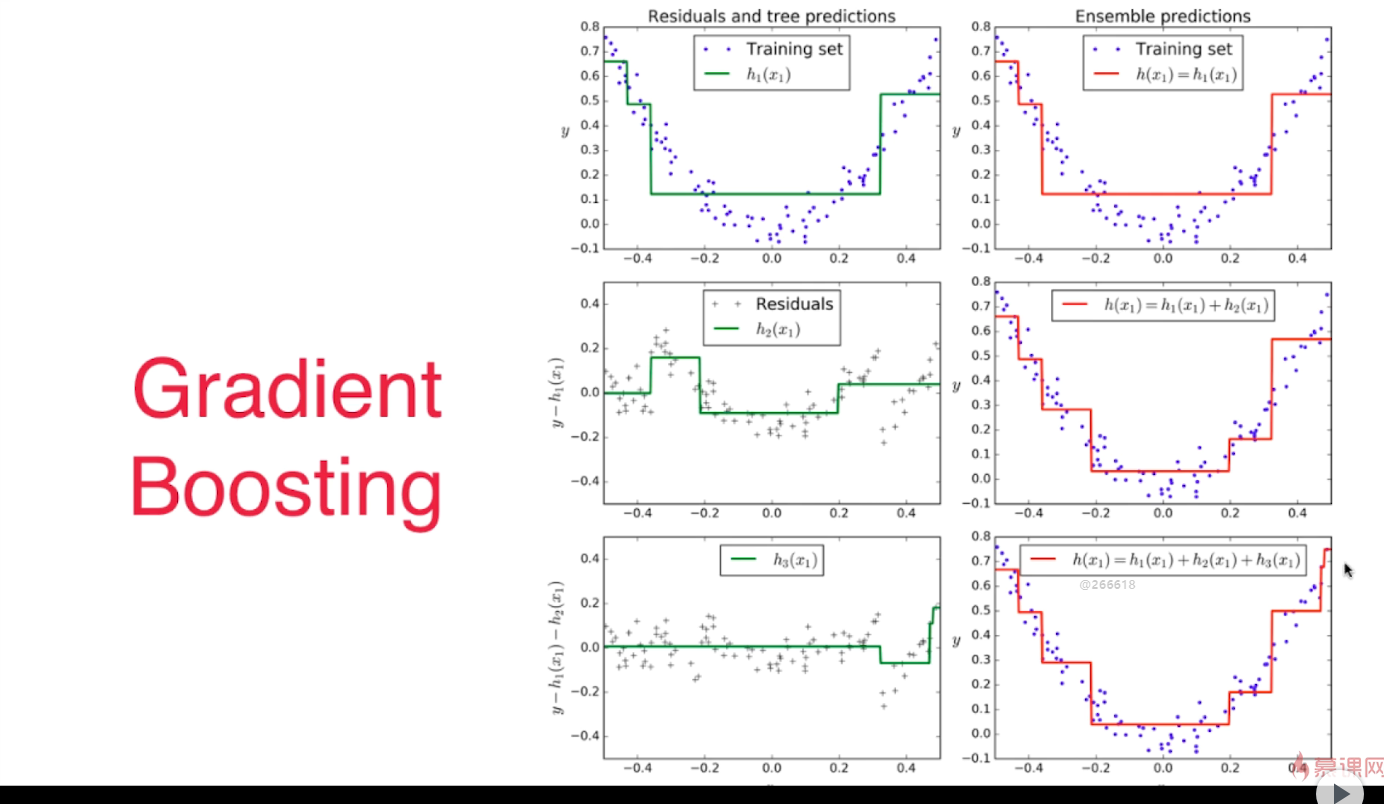

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
gb_clf =GradientBoostingClassifier(max_depth=2, # Gradient Boosting 就是用决策树的
                                   n_estimators=30)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [12]:
gb_clf.score(X_test, y_test)

0.90400000000000003

## Gradient Boosting 解决回归问题

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor